## Plot all features

### Imports

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [36]:
file_dir = "../data/ObesityDataSet.csv"
df = pd.read_csv(file_dir)

### Functions

In [37]:
def plot_features(df):
    numeric_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]

    all_cols = df.columns
    n = len(all_cols)

    ncols = 4
    nrows = int(np.ceil(n / ncols))

    fig, axes = plt.subplots(nrows, ncols, figsize=(4*ncols, 3*nrows))
    axes = axes.flatten()

    for i, col in enumerate(all_cols):
        ax = axes[i]
        if col in numeric_cols:
            df[col].plot(kind="hist", bins=20, ax=ax, color="skyblue", edgecolor="black")
        else:
            df[col].astype(str).value_counts().plot(kind="bar", ax=ax, color="salmon", edgecolor="black")
        ax.set_title(col)
        ax.set_ylabel("")
        ax.set_xlabel("")
        ax.grid(False)

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [38]:
def is_not_integer(x):
    try:
        return not float(x).is_integer()
    except:
        return False

def decimal_places(x):
    try:
        s = str(x)
        if "." in s:
            return len(s.split(".")[1])
        return 0
    except:
        return 0

def show_corrupted_data_percentage(df):
    ordinal_cols = ["Age", "FCVC", "NCP", "CH2O", "FAF", "TUE"]
    results = {}
    total_rows = len(df)

    for col in ["Height", "Weight"]:
        if col in df.columns:
            mask = df[col].apply(lambda x: decimal_places(x) > 2)
            count = mask.sum()
            perc = (count / total_rows) * 100
            results[col] = {
                "count": count,
                "percentage": f"{perc:.0f}%"
            }

    for col in ordinal_cols:
        if col in df.columns:
            if col == "NCP":
                mask = df[col].apply(lambda x: is_not_integer(x) or float(x) > 3)
            else:
                mask = df[col].apply(is_not_integer)
            count = mask.sum()
            perc = (count / total_rows) * 100
            results[col] = {
                "count": count,
                "percentage": f"{perc:.0f}%"
            }

    results_df = pd.DataFrame(results).T
    print(results_df)


### Visualization before pre-processing

       count percentage
Height  1537        73%
Weight  1436        68%
Age     1375        65%
FCVC     826        39%
NCP      709        34%
CH2O    1290        61%
FAF     1208        57%
TUE     1153        55%


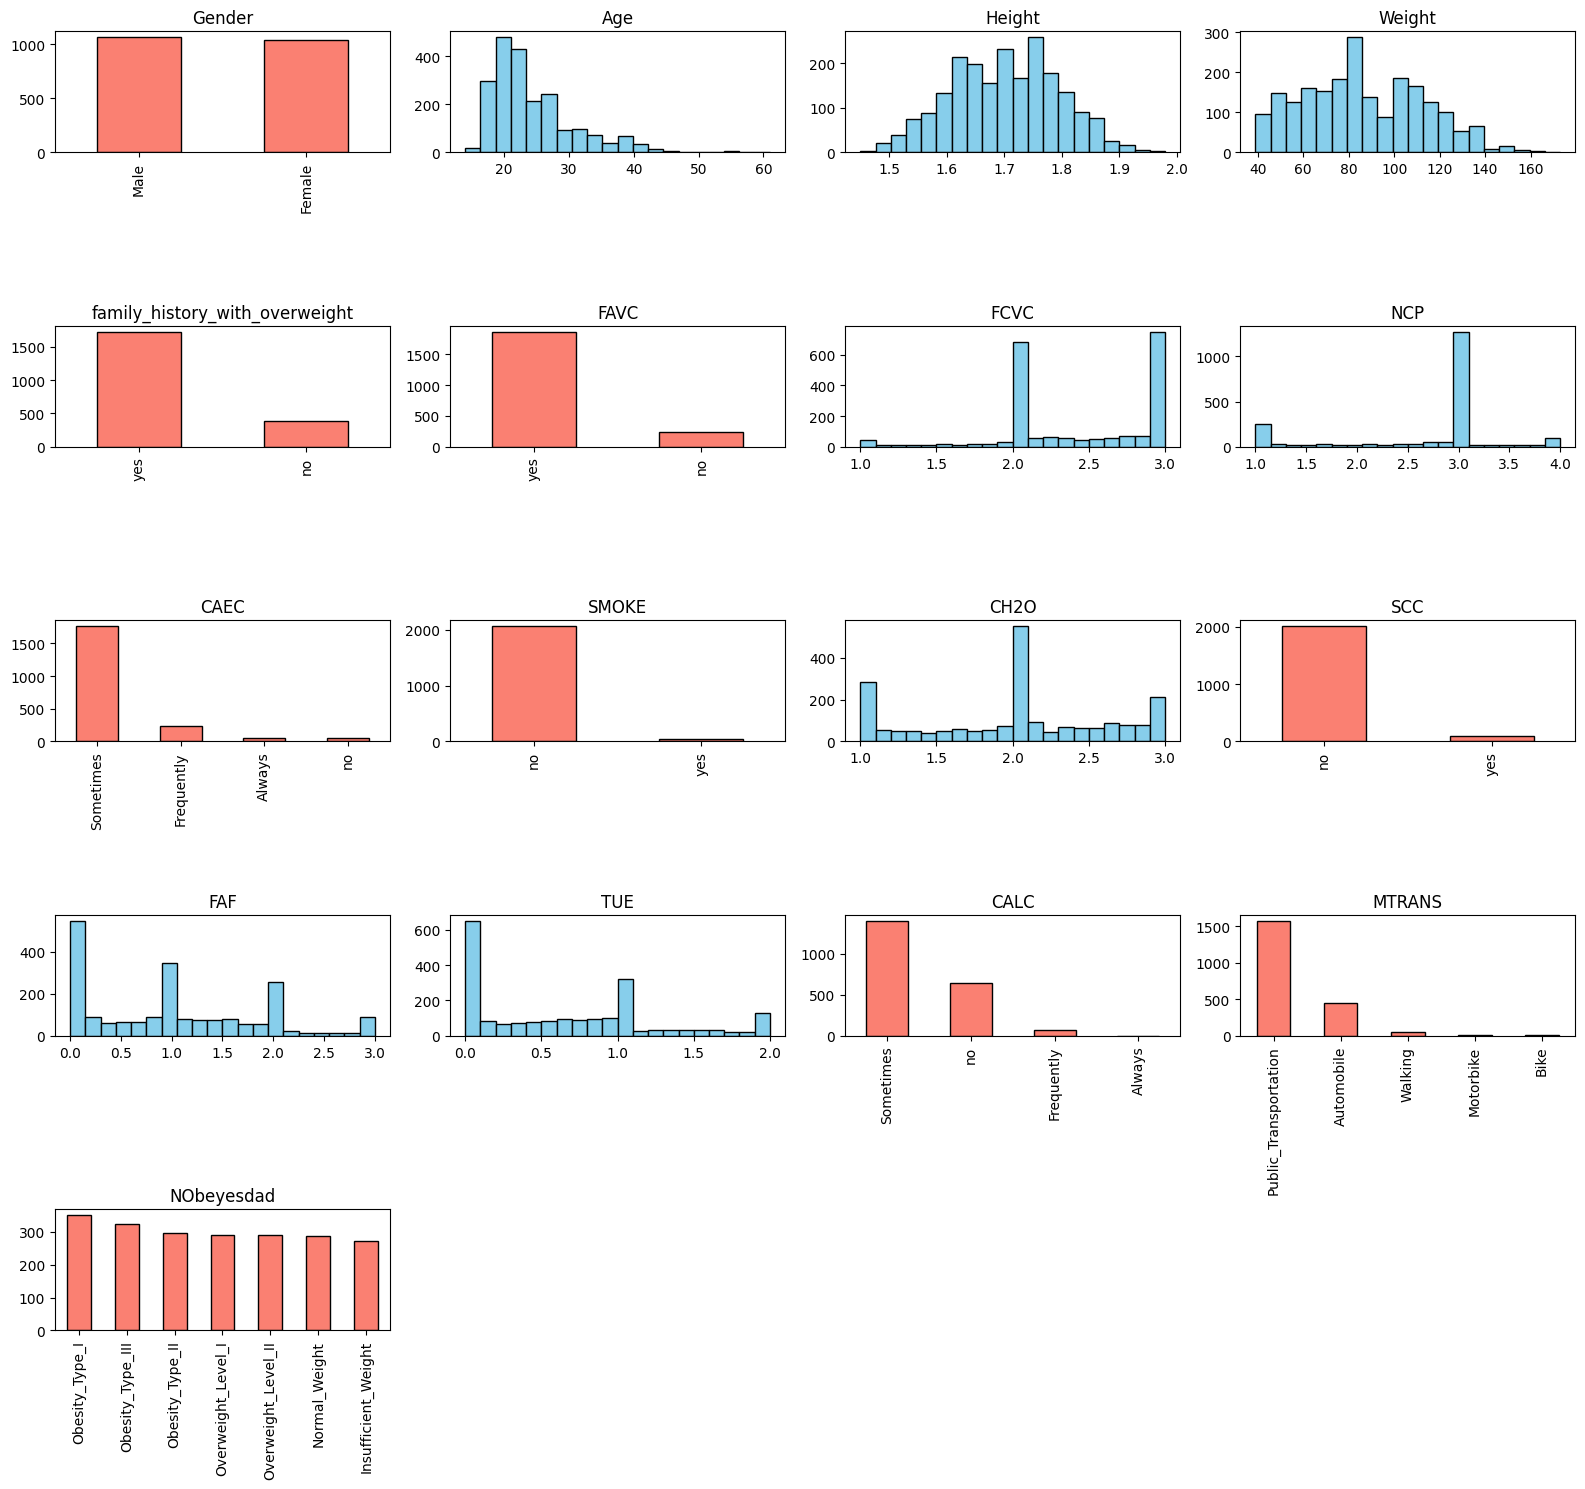

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [39]:
show_corrupted_data_percentage(df)
plot_features(df)
df.tail()

### Pre-processing
- Round to the nearest integer: Age, FCVC, NCP, CH2O, FAF, TUE
- Round to 1 decimal place: Weight
- Round to 2 decimal places: Height
- Handle NCP = 4 (228 samples, ~11%): either remove those samples, drop the feature, or replace all 4’s with 3 → makes sense since whoever entered 4 likely meant “more than 3 meals”

In [40]:
df_clean = df.copy()

# clean dataset
cols = ["Age", "FCVC", "NCP", "CH2O", "FAF", "TUE"]
df_clean[cols] = df_clean[cols].round(0).astype(int)
df_clean["Weight"] = df_clean["Weight"].round(1)
df_clean["Height"] = df_clean["Height"].round(2)
df_clean.loc[df_clean["NCP"] == 4, "NCP"] = 3

# save to new csv
df_clean.to_csv("../Data/ObesityDataSet_Clean.csv", index=False)

### Visualization after pre-processing

       count percentage
Height     0         0%
Weight     0         0%
Age        0         0%
FCVC       0         0%
NCP        0         0%
CH2O       0         0%
FAF        0         0%
TUE        0         0%


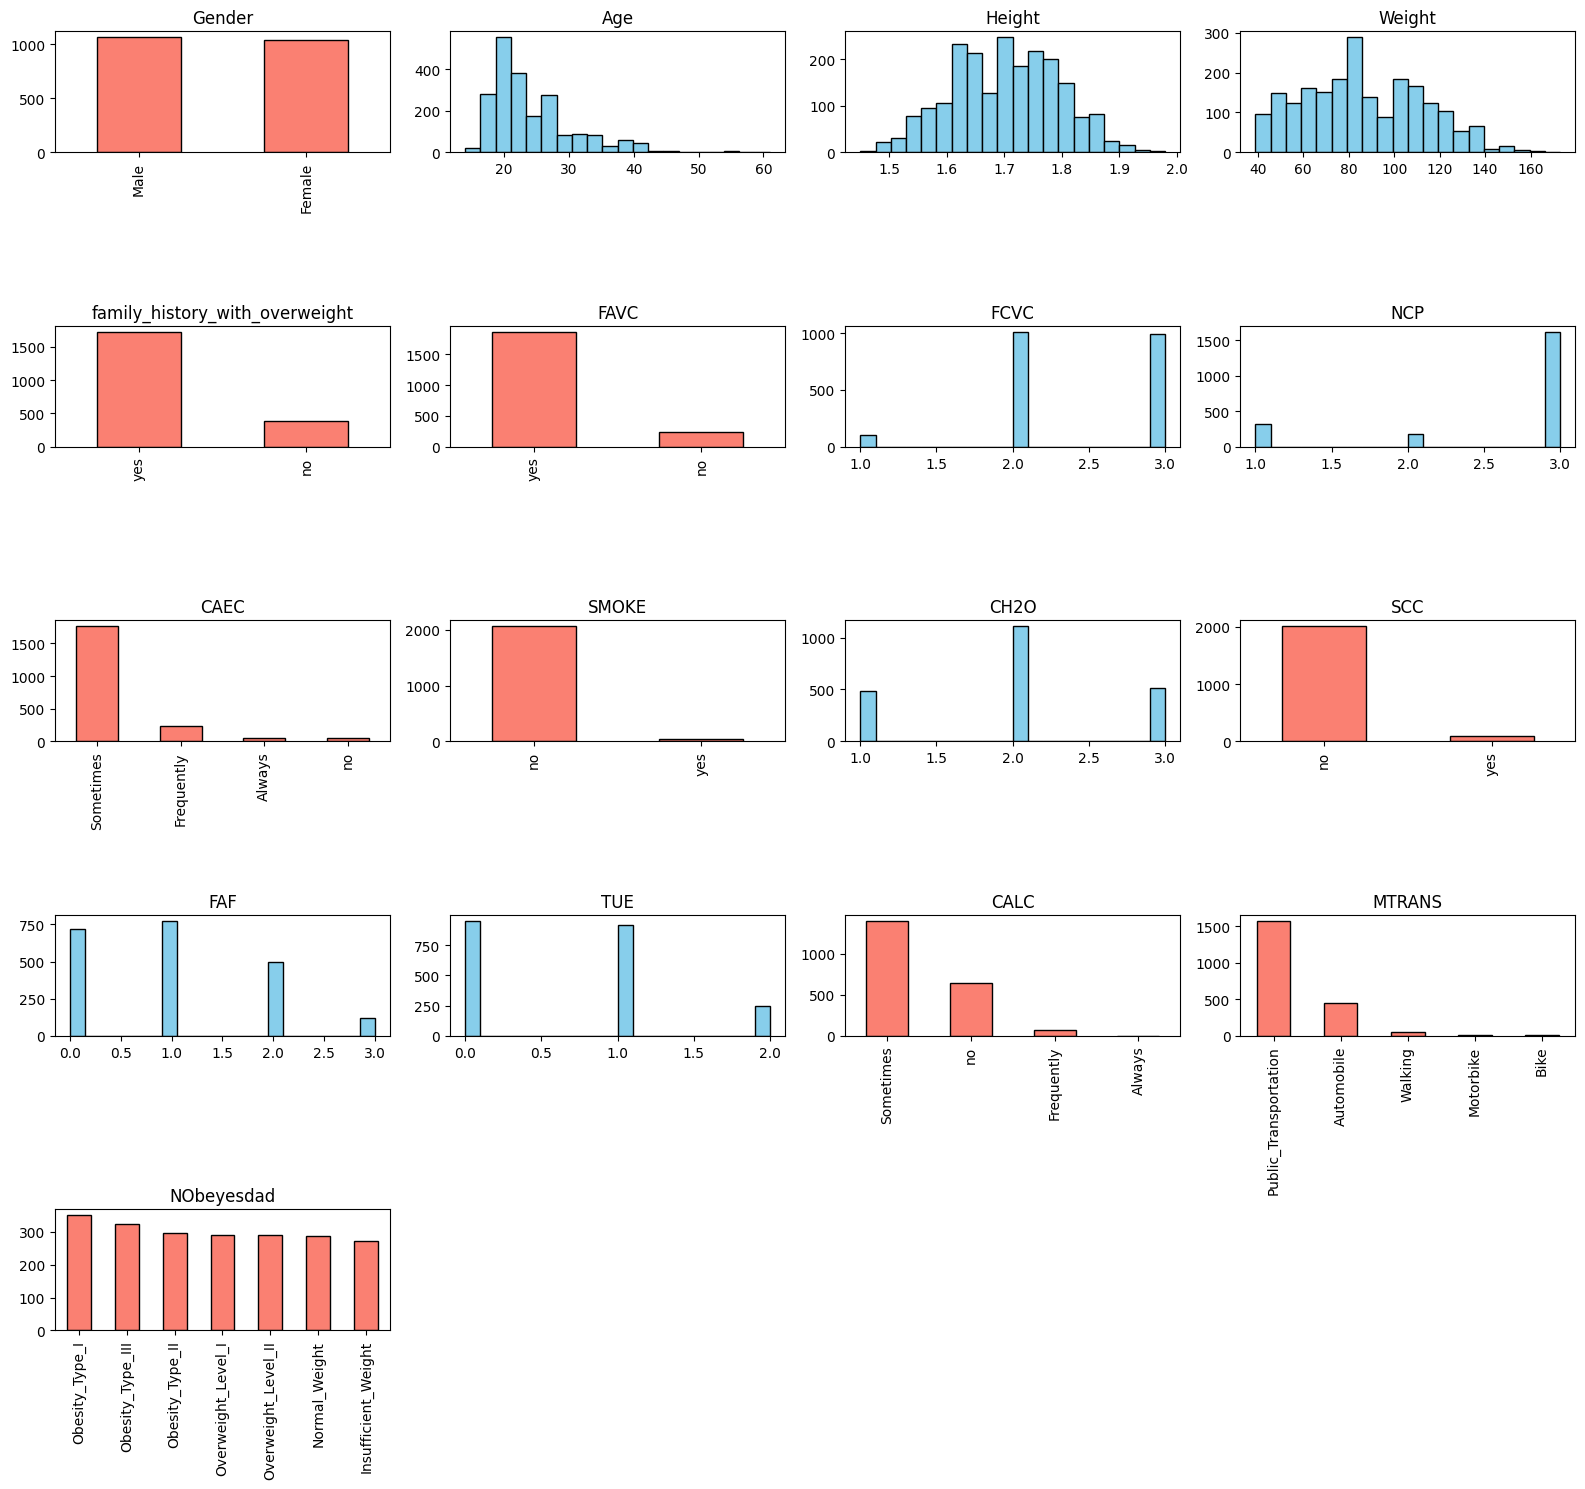

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,21,1.71,131.4,yes,yes,3,3,Sometimes,no,2,no,2,1,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,133.7,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,133.7,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133.3,yes,yes,3,3,Sometimes,no,3,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,24,1.74,133.5,yes,yes,3,3,Sometimes,no,3,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III


In [41]:
show_corrupted_data_percentage(df_clean)
plot_features(df_clean)
df_clean.tail()

### Summary statistics
- Média, variância, standard deviation, mediana, percentil, mode, covariância e correlação

In [42]:
continuous_cols = ["Age", "Weight", "Height"]
discrete_cols = ["Gender", "family_history_with_overweight", "NObeyesdad", "FAVC", "FCVC", "NCP", "CAEC", "SMOKE", "CH2O", "SCC", "FAF", "TUE", "CALC", "MTRANS"]

for col in continuous_cols:
    print(df_clean[col].describe(), "\n")

    summary = {}

for col in discrete_cols:
    counts = df_clean[col].value_counts()
    proportions = df_clean[col].value_counts(normalize=True) * 100
    mode = df_clean[col].mode()[0]

    summary[col] = pd.DataFrame({
        "Counts": counts,
        "Proportion (%)": proportions.round(2)
    })
    summary[col]["Mode"] = mode   # adiciona a moda em todas as linhas para esse atributo

    print(f"\n=== {col} ===")
    print(summary[col])

count    2111.000000
mean       24.315964
std         6.357078
min        14.000000
25%        20.000000
50%        23.000000
75%        26.000000
max        61.000000
Name: Age, dtype: float64 

count    2111.000000
mean       86.585978
std        26.191165
min        39.000000
25%        65.450000
50%        83.000000
75%       107.450000
max       173.000000
Name: Weight, dtype: float64 

count    2111.000000
mean        1.701620
std         0.093368
min         1.450000
25%         1.630000
50%         1.700000
75%         1.770000
max         1.980000
Name: Height, dtype: float64 


=== Gender ===
        Counts  Proportion (%)  Mode
Gender                              
Male      1068           50.59  Male
Female    1043           49.41  Male

=== family_history_with_overweight ===
                                Counts  Proportion (%) Mode
family_history_with_overweight                             
yes                               1726           81.76  yes
no                    